In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/tt_3bff/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT, use_train_dm=True)

pathDT = pathTT + "20250130_NBFF_LFADS_Viz/prefix=tt_3bff_max_epochs=500_seed=0/"
an_DT = Analysis_DD.create(run_name = "DT", filepath = pathDT, model_type = "LFADS")

/home/csverst/Github/CtDBenchmark/



Iteration 500/10000
q = 1.15E-02 +/- 4.97E-02
dq = 4.98E-05 +/- 2.02E-04

Iteration 1000/10000
q = 2.47E-03 +/- 1.15E-02
dq = 5.52E-06 +/- 2.62E-05

Iteration 1500/10000
q = 1.02E-03 +/- 4.80E-03
dq = 1.45E-06 +/- 7.27E-06

Iteration 2000/10000
q = 5.51E-04 +/- 2.61E-03
dq = 5.86E-07 +/- 2.96E-06

Iteration 2500/10000
q = 3.43E-04 +/- 1.63E-03
dq = 2.95E-07 +/- 1.47E-06

Iteration 3000/10000
q = 2.28E-04 +/- 1.04E-03
dq = 1.77E-07 +/- 1.03E-06

Iteration 3500/10000
q = 1.57E-04 +/- 6.54E-04
dq = 1.12E-07 +/- 6.06E-07

Iteration 4000/10000
q = 1.12E-04 +/- 4.42E-04
dq = 7.25E-08 +/- 3.33E-07

Iteration 4500/10000
q = 8.19E-05 +/- 3.09E-04
dq = 5.00E-08 +/- 2.20E-07

Iteration 5000/10000
q = 6.08E-05 +/- 2.21E-04
dq = 3.53E-08 +/- 1.49E-07

Iteration 5500/10000
q = 4.58E-05 +/- 1.60E-04
dq = 2.54E-08 +/- 1.02E-07

Iteration 6000/10000
q = 3.49E-05 +/- 1.18E-04
dq = 1.86E-08 +/- 7.19E-08

Iteration 6500/10000
q = 2.69E-05 +/- 8.77E-05
dq = 1.39E-08 +/- 5.18E-08

Iteration 7000/10000
q = 

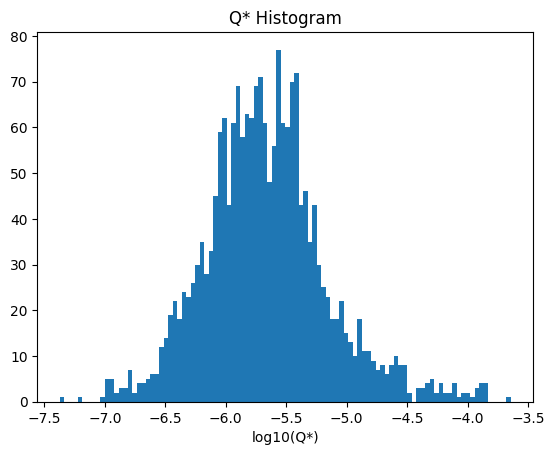

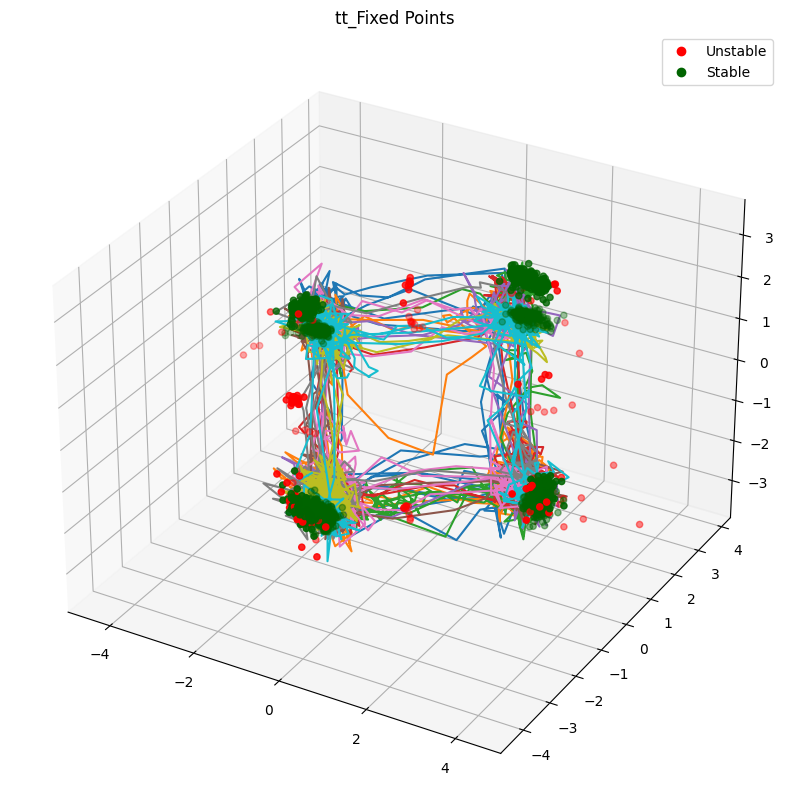

In [3]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=10000,
    device = "cpu",
)

[[-0.06481925  0.23724124  0.06552625 ... -0.1323455   0.13282931
   0.12210032]
 [-0.7261944   0.11617167 -0.45891222 ... -0.2959663  -0.7302957
   0.5173503 ]
 [-0.12092416 -0.03750413  0.10149927 ...  0.8035402   0.17402126
  -0.5375256 ]
 ...
 [-0.7684403  -0.42941993 -0.03128511 ...  0.8341547  -0.7892844
   0.33705723]
 [-0.70307946  0.2277827   0.47563067 ... -0.6623718  -0.14138597
  -0.12444475]
 [-0.11462878 -0.21253282 -0.3755157  ...  0.80988157 -0.02209333
   0.32008976]]


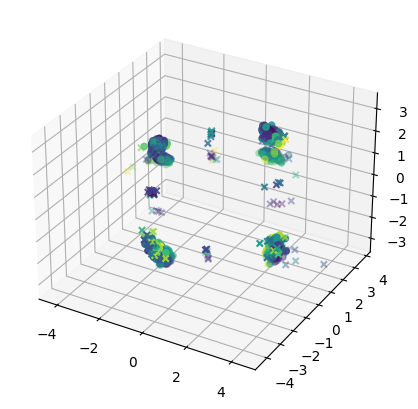

In [10]:
from sklearn.decomposition import PCA

q_thresh = 8e-6
q_flag = tt_fps.qstar < q_thresh

stable= tt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = tt_fps.qstar
qstar = qstar[q_flag]
x_star = tt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')



Iteration 500/1000
q = 2.06E-02 +/- 6.73E-02
dq = 8.04E-05 +/- 2.55E-04

Iteration 1000/1000
q = 5.63E-03 +/- 1.89E-02
dq = 1.02E-05 +/- 3.35E-05
Maximum iteration count reached. Terminating.
Found 2000 unique fixed points.
Decomposing Jacobians in a single batch.
Sorting by Eigenvalue magnitude.


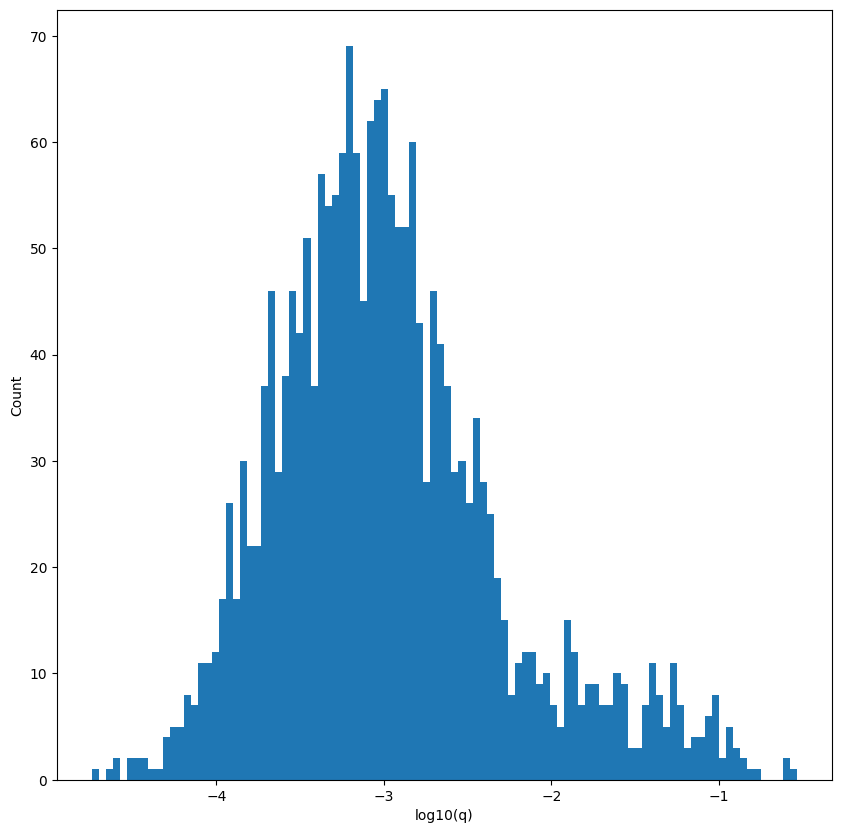

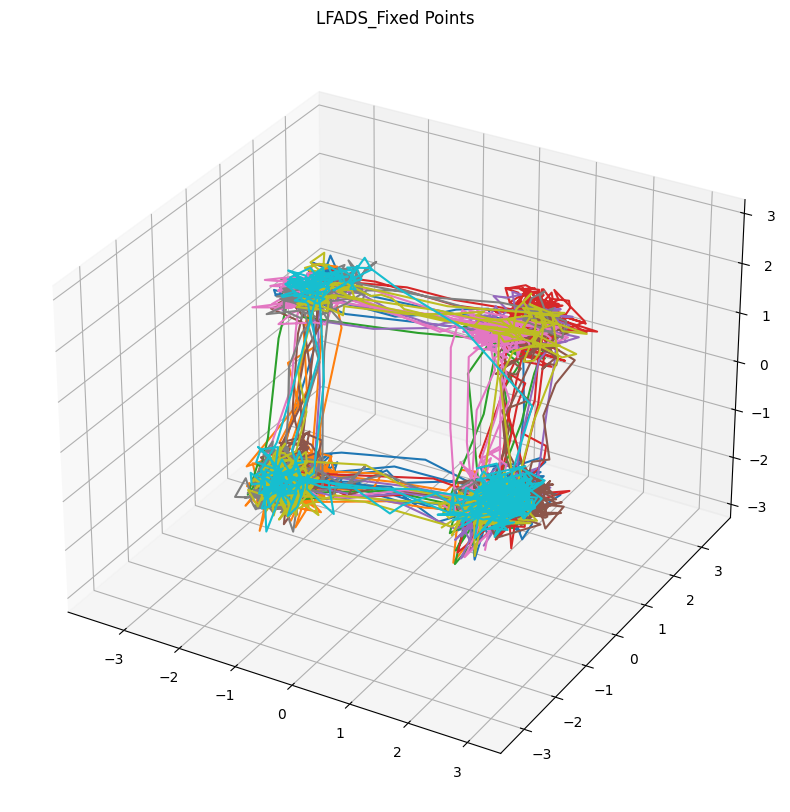

In [8]:
dt_fps = an_DT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=1000,
    device = "cpu",
)

In [6]:
print(dt_fps)

[[ 0.41072115 -0.04064387  0.19066605 ... -0.21631558 -0.03260567
   0.15289177]
 [-0.35454744  0.1998152  -0.08693869 ...  0.40507177 -0.11514682
  -0.04440805]
 [-0.3002082   0.1623885  -0.09360769 ...  0.46473762 -0.14665604
  -0.0782415 ]
 ...
 [ 0.5493135   0.17770234  0.29842925 ... -0.34291926 -0.04851957
   0.31149703]
 [-0.30209845  0.14448823 -0.10351469 ...  0.45040005 -0.14460507
  -0.08505549]
 [-0.06102442 -0.03161061  0.18110783 ... -0.2390818  -0.0442214
   0.1858273 ]]


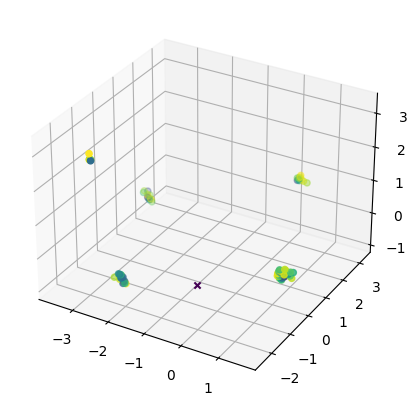

In [7]:
q_thresh = 8e-7
q_flag = dt_fps.qstar < q_thresh

stable= dt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = dt_fps.qstar
qstar = qstar[q_flag]
x_star = dt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')
